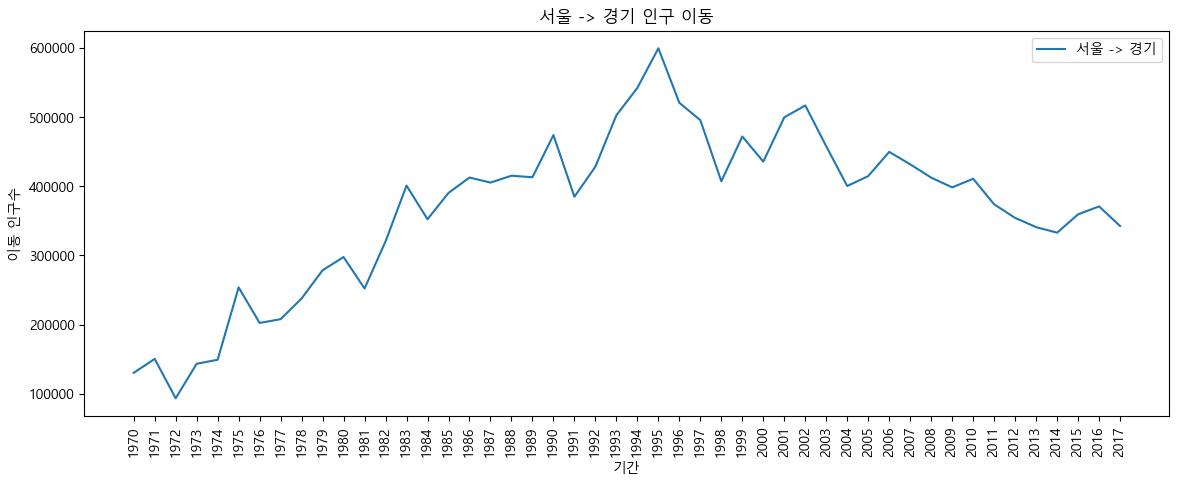

In [71]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.ffill()

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul = df_seoul.rename({'전입지별':'전입지'}, axis=1)
df_seoul = df_seoul.set_index('전입지')

# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('이동 인구수')           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best')     #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

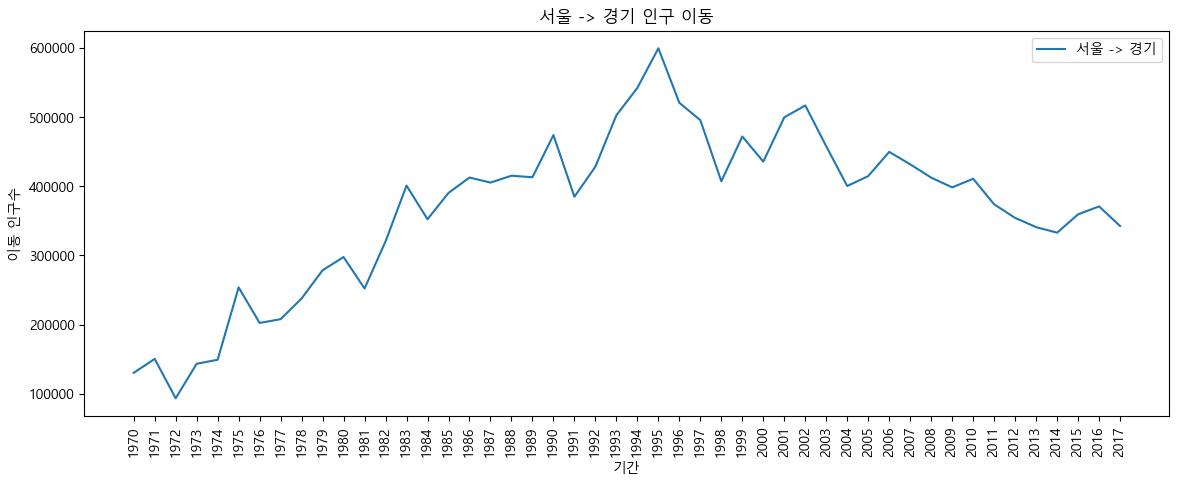

In [2]:
# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('이동 인구수')           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best')     #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

In [ ]:
# 경기 -> 서울
import pandas as pd
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')
df
#1. head() 대략적으로 데이터 확인
#2. 데이터정보확인 info() describe()
#3. 결측치 확인 여부
#  3.1 결측치 확인되면 drop fillna 선택

#=====================데이터 전처리과정=====================
#결측치 확인1
# #전출지 NaN이 전부 NaN 인지 중간에 다른게 있는지 확인이 필요
df.tail() # ==> 여기도 NaN이긴 했으나, 
df['전출지별'].value_counts() #counts 보니까 전국말고도 서울, 부산, 대구... 등이 있음.
# ==> 전출지별은 전부 NaN이 아니었다! 그럼 NaN을 채워야함. 셀병합으로 보임. 
df['전출지별']=df['전출지별'].ffill() #==> 위쪽 데이터값으로 채워짐.
#=======>결측치 대치, 문자열이고 병합된 컬럼의 정보가 na로 표기되어서 앞의 문자열로 대처
df['전출지별'].value_counts() #다시 확인



#결측치 확인2
# df.info()   # 출력물 중간에 ... 부분에 데이터가 누락된것이 있는지 확인 필요
df.isna().sum().values.sum() # np.int64(0) 전체 누락된 데이터가 없음을 확인
# df.describe()
# df.info() # Dtype 에서 object로 나옴 => object 변경 필요!
# pd.to_numeric(df.loc[1:, '1970']) #에러 :  Unable to parse string "-" : 숫자가 아닌 - 존재함을 확인할 수 있음.
pd.to_numeric(df.loc[1:, '1970'], errors='coerce') #-이 부분을 NaN으로 변경해서 나중에 결측치 삭제/변경 용이하게 변경
#=======> 문자형 숫자 -> 숫자로 변경하는데, 변경불가능한 데이터는 결측치로 대치

1      4046536.0
2      1742813.0
3       448577.0
4            NaN
5            NaN
         ...    
320        139.0
321        631.0
322        374.0
323        474.0
324       9290.0
Name: 1970, Length: 324, dtype: float64

In [27]:
#경기에서 서울로
mask = (df['전출지별']  == '경기도') & (df['전입지별'] == '서울특별시')
df2 = df[mask]
df2

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
164,경기도,서울특별시,95388,95423,90470,107177,107518,207641,144524,154021,...,323515,317952,285963,272407,254175,246464,249701,239557,234357,234448


In [ ]:
df2.isna().sum().values.sum()  #np.int64(0) 결측치 없음을 확인
# df2.info() #Dtype object 확인
df2.T.index[2:]  #전부 연도로만 된것을 확인
df3 = df2.iloc [:, 2:] #df2.loc[:, '1970':] 동일

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
164,95388,95423,90470,107177,107518,207641,144524,154021,164771,168188,...,323515,317952,285963,272407,254175,246464,249701,239557,234357,234448


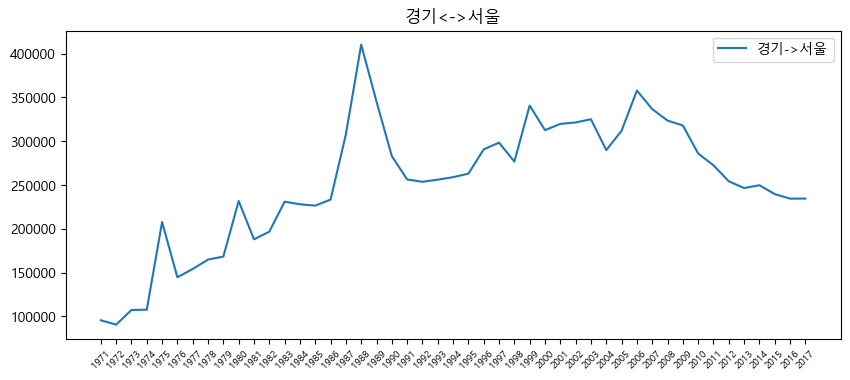

In [66]:
import matplotlib.pyplot as plt
df3.values.shape  #(1,47) 로 2차원..
df3.values.flatten() #1차원으로 펼쳐짐..? (1,1,48) [[[~~]]] ==> flatten하면 한번에 1차원으로 변경
plt.figure(figsize=(10,4))
plt.xticks(rotation=45, fontsize=7)
plt.plot(df3.columns, df3.values.flatten())
plt.title('경기<->서울')
plt.legend(labels = ['경기->서울'], loc='best') #범례labels = ['경기->서울'] / 범례위치 loc='center', upper 등 가능
plt.show()


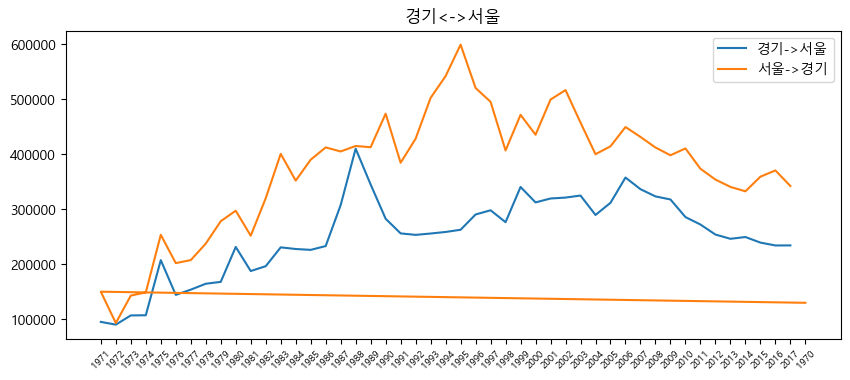

In [ ]:
import matplotlib.pyplot as plt
df3.values.shape  
df3.values.flatten() 
plt.figure(figsize=(10,4))
plt.title('경기<->서울')


plt.plot(df3.columns, df3.values.flatten(), label = '경기->서울')  #경기 ->서울
plt.plot(sr_one.index, sr_one.values, label = '서울->경기')  #서울-> 경기 데이터 추가

plt.legend(loc='best') #라벨 헷갈리니까 상기 plot에 기재하고 legend는 따로 입력할것
# plt.legend(labels = ['경기->서울', '서울->경기'], loc='best') 

plt.xticks(rotation=45, fontsize=7)
plt.show()